<a href="https://colab.research.google.com/github/37105571/Data-Cleaning-e-Data-Wrangling-/blob/main/DESAFIO_5_Data_Cleaning_e_Data_Wrangling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sidetable
!pip install plotly



In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go






In [ ]:
df = pd.read_csv('/content/data.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [ ]:
df = df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df = df.dropna(subset=['Description'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df = df.query("UnitPrice > 0 and Quantity > 0")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
df.duplicated().sum()

5192

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
df = df.astype({'CustomerID': 'int64'})
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format= '%m/%d/%Y %H:%M')
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,int64
Country,object


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


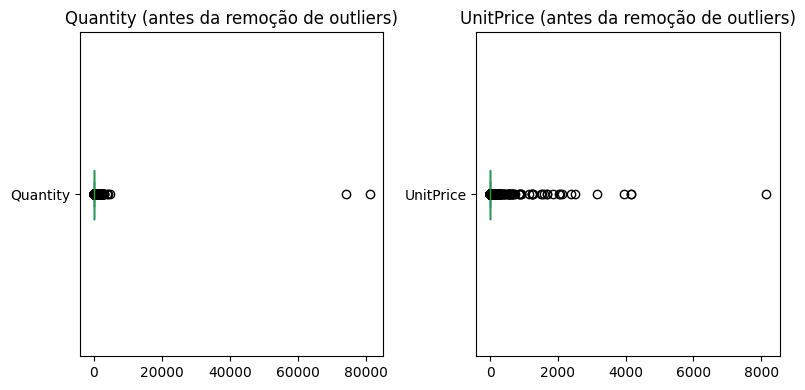

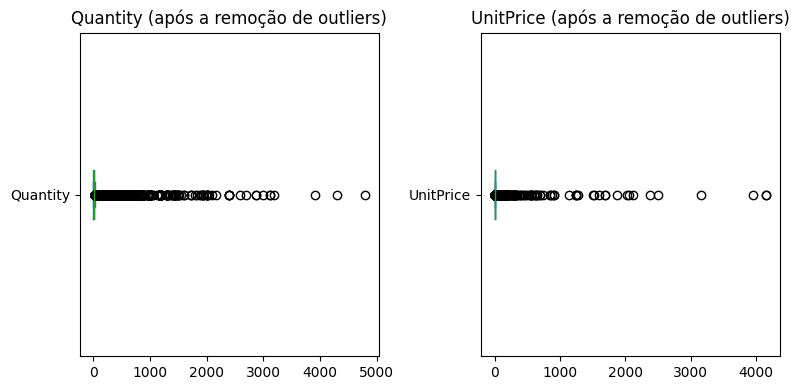

(392692, 392689, 3)

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
df['Quantity'].plot(kind='box', vert=False, title='Quantity (antes da remoção de outliers)')

plt.subplot(1, 2, 2)
df['UnitPrice'].plot(kind='box', vert=False, title='UnitPrice (antes da remoção de outliers)')

plt.tight_layout()
plt.show()

df_filtrado = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
df_filtrado['Quantity'].plot(kind='box', vert=False, title='Quantity (após a remoção de outliers)')

plt.subplot(1, 2, 2)
df_filtrado['UnitPrice'].plot(kind='box', vert=False, title='UnitPrice (após a remoção de outliers)')

plt.tight_layout()
plt.show()

quantidade_inicial = df.shape[0]
quantidade_final = df_filtrado.shape[0]
quantidade_removida = quantidade_inicial - quantidade_final

quantidade_inicial, quantidade_final, quantidade_removida


In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
ultima_compra = df['InvoiceDate'].max()

print("A data da última compra é:", ultima_compra)


A data da última compra é: 2011-12-09 12:50:00


In [ ]:
agg_top10_paises = df.groupby(['Country'])['TotalPrice'].agg('mean')
agg_top10_paises = agg_top10_paises.sort_values(ascending=False)
agg_top10_paises = agg_top10_paises.head(10)
agg_top10_paises

,TotalPrice
Country,
Netherlands,121.003111
Australia,117.234386
Japan,116.561900
Singapore,95.852658
Sweden,85.261844
Denmark,49.882474
Lithuania,47.458857
Lebanon,37.641778
EIRE,36.709446


In [ ]:
agg_top10_produtos = df.groupby(['Description'])['TotalPrice'].agg('sum')
agg_top10_produtos = agg_top10_produtos.sort_values(ascending=False)
agg_top10_produtos = agg_top10_produtos.head(10)
agg_top10_produtos

,TotalPrice
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142264.75
WHITE HANGING HEART T-LIGHT HOLDER,100392.10
JUMBO BAG RED RETROSPOT,85040.54
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68785.23
ASSORTED COLOUR BIRD ORNAMENT,56413.03
Manual,53419.93


In [ ]:
agg_venda_total_mes = df.groupby(df['InvoiceDate'].dt.month)['TotalPrice'].mean()
agg_venda_total_mes


,TotalPrice
InvoiceDate,
1,27.067911
2,22.637010
3,22.109481
4,20.878809
5,24.128349
6,24.513335
7,22.534345
8,24.040726
9,23.965570


In [ ]:
agg_venda_total_mes_pais = df.groupby(['Country', df['InvoiceDate'].dt.month])['TotalPrice'].sum().reset_index()
agg_venda_total_mes_pais.rename(columns={'InvoiceDate': 'Month'}, inplace=True)
agg_venda_total_mes_pais = agg_venda_total_mes_pais.sort_values(by=['TotalPrice'],ascending=False)
agg_venda_total_mes_pais = agg_venda_total_mes_pais.head(10)
agg_venda_total_mes_pais

,Country,Month,TotalPrice
264,United Kingdom,11,975251.390
265,United Kingdom,12,967859.160
263,United Kingdom,10,821220.130
262,United Kingdom,9,794806.692
258,United Kingdom,5,550359.350
259,United Kingdom,6,523775.590
261,United Kingdom,8,497194.910
260,United Kingdom,7,484545.591
256,United Kingdom,3,465784.190
254,United Kingdom,1,440876.330


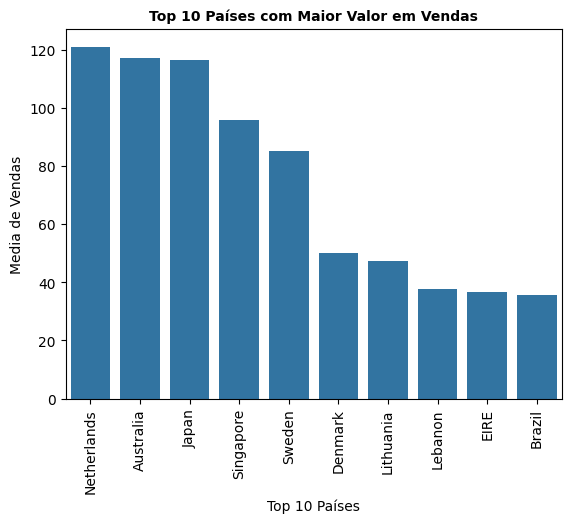

In [ ]:
ax = sns.barplot(x=agg_top10_paises.index, y=agg_top10_paises.values)
ax.set(xlabel= "Top 10 Países", ylabel= "Media de Vendas")
plt.xticks(rotation=90)
plt.title("Top 10 Países com Maior Valor em Vendas", loc= "center", fontsize= 10, fontweight= "bold", color= "black")
plt.show()

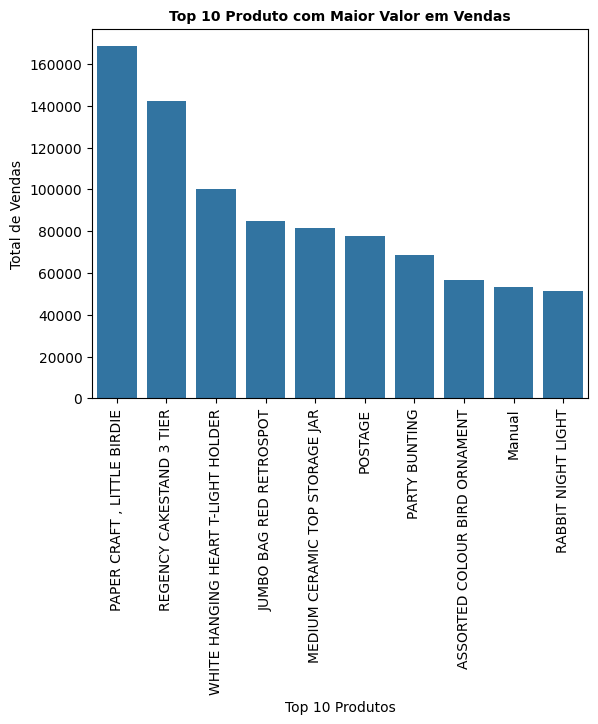

In [ ]:
ax = sns.barplot(x=agg_top10_produtos.index, y=agg_top10_produtos.values)
ax.set(xlabel= "Top 10 Produtos", ylabel= "Total de Vendas")
plt.xticks(rotation=90)
plt.title("Top 10 Produto com Maior Valor em Vendas", loc= "center", fontsize= 10, fontweight= "bold", color= "black")
plt.show()

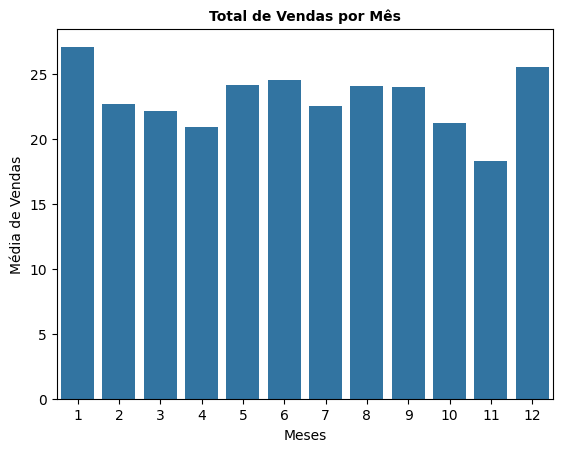

In [ ]:
ax = sns.barplot(x=agg_venda_total_mes.index, y=agg_venda_total_mes.values)
ax.set(xlabel= "Meses", ylabel= "Média de Vendas")

plt.title("Total de Vendas por Mês", loc= "center", fontsize= 10, fontweight= "bold", color= "black")
plt.show()


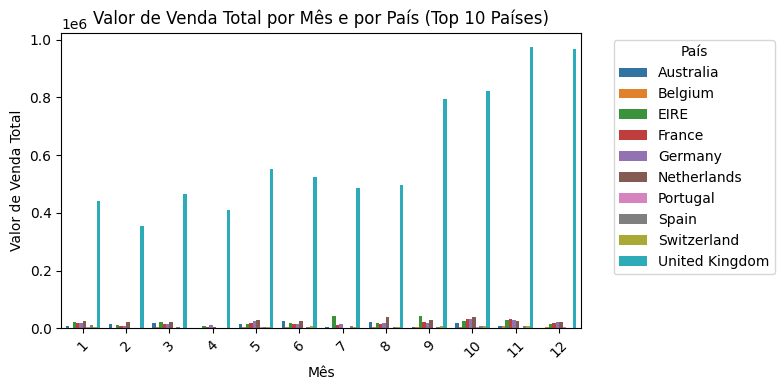

In [ ]:
top_10_paises = df['Country'].value_counts().nlargest(10).index
df_top_paises = df[df['Country'].isin(top_10_paises)]

mes_pais = df_top_paises.groupby([df_top_paises['InvoiceDate'].dt.month, 'Country'])['TotalPrice'].sum().reset_index()
mes_pais.rename(columns={'InvoiceDate': 'Month'}, inplace=True)


plt.figure(figsize=(8, 4))
sns.barplot(x='Month', y='TotalPrice', hue='Country', data=mes_pais)
plt.title('Valor de Venda Total por Mês e por País (Top 10 Países)')
plt.xlabel('Mês')
plt.ylabel('Valor de Venda Total')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
pedido_agrupado = df.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate': 'max','TotalPrice': 'sum'}).reset_index()

ultima_data_disponivel = pedido_agrupado['InvoiceDate'].max()

rfm = pedido_agrupado.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ultima_data_disponivel - x.max()).days,
    'InvoiceNo': 'sum',
    'TotalPrice': 'mean'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}).reset_index()

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346,325,541431,77183.600000
1,12347,1,537626542237549222556201562032573511581180,615.714286
2,12348,74,539318541998548955568172,449.310000
3,12349,18,577609,1757.550000
4,12350,309,543037,334.400000
